
# Beta分布
***
## Definition
beta分布可以看作一个概率的概率分布，当你不知道一个东西的具体概率是多少时，它可以给出了所有概率出现的可能性大小

举一个简单的例子，熟悉棒球运动的都知道有一个指标就是棒球击球率(batting average)，就是用一个运动员击中的球数除以击球的总数，我们一般认为0.266是正常水平的击球率，而如果击球率高达0.3就被认为是非常优秀的。现在有一个棒球运动员，我们希望能够预测他在这一赛季中的棒球击球率是多少。你可能就会直接计算棒球击球率，用击中的数除以击球数，但是如果这个棒球运动员只打了一次，而且还命中了，那么他就击球率就是100%了，这显然是不合理的，因为根据棒球的历史信息，我们知道这个击球率应该是0.215到0.36之间才对啊。对于这个问题一个最好的方法就是用beta分布，这表示在我们没有看到这个运动员打球之前，我们就有了一个大概的范围。beta分布的定义域是(0,1)这就跟概率的范围是一样的。接下来我们将这些先验信息转换为beta分布的参数，我们知道一个击球率应该是平均0.27左右，而他的范围是0.21到0.35，那么根据这个信息，我们可以取α=81,β=219（击中了81次，未击中219次）

之所以取这两个参数是因为：
- beta分布的均值是从图中可以看到这个分布主要落在了(0.2,0.35)间，这是从经验中得出的合理的范围。
- 在这个例子里，我们的x轴就表示各个击球率的取值，x对应的y值就是这个击球率所对应的概率。也就是说beta分布可以看作一个概率的概率分布。

<img src="./img/1.png" style="width:450px;height:480px;float:left">

<img src="./img/2.png" style="width:450px;height:480px;float:left">

- 0和β0是一开始的参数，在这里是81和219。当，α增加了1(击中了一次)。β没有增加(没有漏球)。这就是我们的新的beta分布Beta(81+1,219)

- 可以看到这个分布其实没多大变化，这是因为只打了1次球并不能说明什么问题。但是如果我们得到了更多的数据，假设一共打了300次，其中击中了100次，200次没击中，那么这一新分布就是:Beta(81+100, 219+200)

- 注意到这个曲线变得更加尖，并且平移到了一个右边的位置，表示比平均水平要高。因此，对于一个我们不知道概率是什么，而又有一些合理的猜测时，beta分布能很好的作为一个表示概率的概率分布。

## Formula


$$ Beta(x|\alpha,\beta) = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha, \beta)}$$
where
$$ B(\alpha, \beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}$$
and
$$ \Gamma(n) = (n-1)! $$<br>
$\alpha$ and $\beta$ 可以当成是我们成功，失败的次数

[ 0.          0.05999388  0.11876339  0.17630854  0.23262932  0.28772574
  0.3415978   0.39424549  0.44566881  0.49586777  0.54484236  0.59259259
  0.63911846  0.68441996  0.72849709  0.77134986  0.81297827  0.85338231
  0.89256198  0.93051729  0.96724824  1.00275482  1.03703704  1.07009489
  1.10192837  1.1325375   1.16192225  1.19008264  1.21701867  1.24273033
  1.26721763  1.29048056  1.31251913  1.33333333  1.35292317  1.37128864
  1.38842975  1.4043465   1.41903887  1.43250689  1.44475054  1.45576982
  1.46556474  1.47413529  1.48148148  1.48760331  1.49250077  1.49617386
  1.49862259  1.49984695  1.49984695  1.49862259  1.49617386  1.49250077
  1.48760331  1.48148148  1.47413529  1.46556474  1.45576982  1.44475054
  1.43250689  1.41903887  1.4043465   1.38842975  1.37128864  1.35292317
  1.33333333  1.31251913  1.29048056  1.26721763  1.24273033  1.21701867
  1.19008264  1.16192225  1.1325375   1.10192837  1.07009489  1.03703704
  1.00275482  0.96724824  0.93051729  0.89256198  0

Text(-0.125,1.6,'Depicted below are the normed probability density function (pdf) and the cumulative density\nfunction (cdf) of a beta distributed random variable $ y \\sim Beta(\\alpha, \\beta)$, given $ \\alpha = 2 $ and $ \\beta = 2$.')

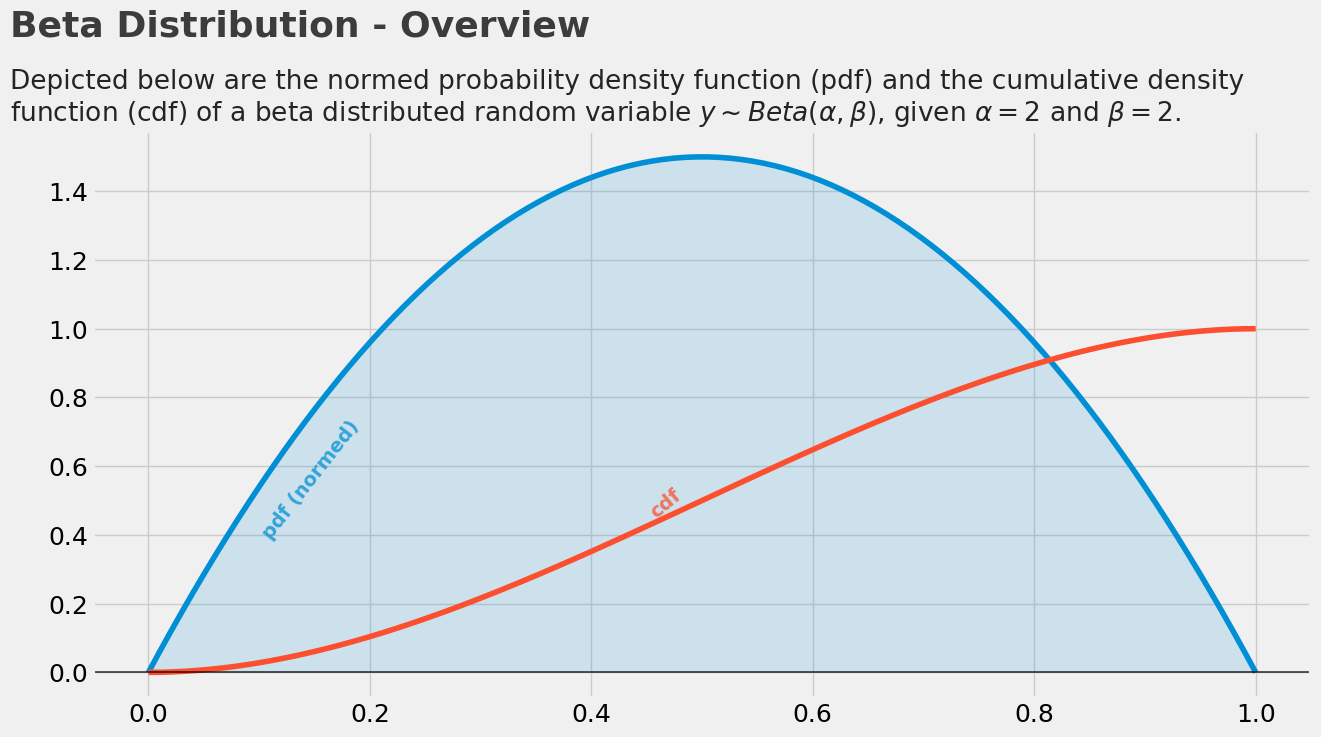

In [1]:
# IMPORTS
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.style as style
from IPython.core.display import HTML

# PLOTTING CONFIG
%matplotlib inline
style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (14, 7)

plt.figure(dpi=100)

# PDF
plt.plot(np.linspace(0, 1, 100), 
         stats.beta.pdf(np.linspace(0, 1, 100),a=2,b=2) 
        )
print (stats.beta.pdf(np.linspace(0, 1, 100),a=2,b=2))
plt.fill_between(np.linspace(0, 1, 100),
                 stats.beta.pdf(np.linspace(0, 1, 100),a=2,b=2),
                 alpha=.15
                )

# CDF
plt.plot(np.linspace(0, 1, 100), 
         stats.beta.cdf(np.linspace(0, 1, 100),a=2,b=2),
        )

# LEGEND
plt.text(x=0.1, y=.7, s="pdf (normed)", rotation=52, alpha=.75, weight="bold", color="#008fd5")
plt.text(x=0.45, y=.5, s="cdf", rotation=40, alpha=.75, weight="bold", color="#fc4f30")

# TICKS
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

# TITLE, SUBTITLE & FOOTER
plt.text(x = -.125, y = 1.85, s = "Beta Distribution - Overview",
               fontsize = 26, weight = 'bold', alpha = .75)
plt.text(x = -.125, y = 1.6, 
         s = 'Depicted below are the normed probability density function (pdf) and the cumulative density\nfunction (cdf) of a beta distributed random variable ' + r'$ y \sim Beta(\alpha, \beta)$, given $ \alpha = 2 $ and $ \beta = 2$.',
         fontsize = 19, alpha = .85)

***
## Parameters

Text(-0.1,12,'Depicted below are three beta distributed random variables with equal $\\frac{\\alpha}{\\beta} $ and varying $\\alpha+\\beta$.\nAs one can see the sum of $\\alpha + \\beta$ (mainly) sharpens the distribution (the bigger the sharper).')

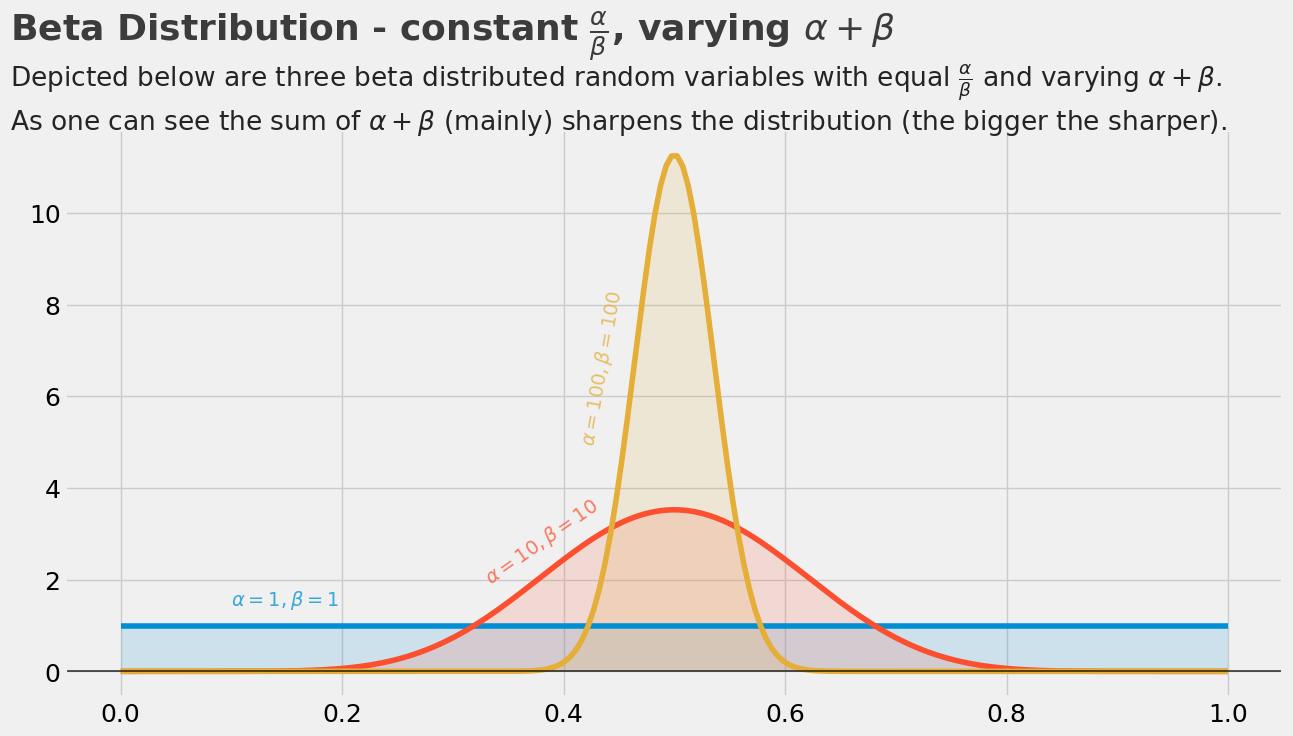

In [2]:
plt.figure(dpi=100)

# A = B = 1
plt.plot(np.linspace(0, 1, 200), 
         stats.beta.pdf(np.linspace(0, 1, 200), a=1, b=1),
        )
plt.fill_between(np.linspace(0, 1, 200),
                 stats.beta.pdf(np.linspace(0, 1, 200), a=1, b=1),
                 alpha=.15,
                )

# A = B = 10
plt.plot(np.linspace(0, 1, 200), 
         stats.beta.pdf(np.linspace(0, 1, 200), a=10, b=10),
        )
plt.fill_between(np.linspace(0, 1, 200),
                 stats.beta.pdf(np.linspace(0, 1, 200), a=10, b=10),
                 alpha=.15,
                )

# A = B = 100
plt.plot(np.linspace(0, 1, 200), 
         stats.beta.pdf(np.linspace(0, 1, 200), a=100, b=100),
        )
plt.fill_between(np.linspace(0, 1, 200),
                 stats.beta.pdf(np.linspace(0, 1, 200), a=100, b=100),
                 alpha=.15,
                )

# LEGEND
plt.text(x=0.1, y=1.45, s=r"$ \alpha = 1, \beta = 1$", alpha=.75, weight="bold", color="#008fd5")
plt.text(x=0.325, y=3.5, s=r"$ \alpha = 10, \beta = 10$", rotation=35, alpha=.75, weight="bold", color="#fc4f30")
plt.text(x=0.4125, y=8, s=r"$ \alpha = 100, \beta = 100$", rotation=80, alpha=.75, weight="bold", color="#e5ae38")


# TICKS
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

# TITLE, SUBTITLE & FOOTER
plt.text(x = -.1, y = 13.75, s = r"Beta Distribution - constant $\frac{\alpha}{\beta}$, varying $\alpha + \beta$",
               fontsize = 26, weight = 'bold', alpha = .75)
plt.text(x = -.1, y = 12, 
         s = 'Depicted below are three beta distributed random variables with '+ r'equal $\frac{\alpha}{\beta} $ and varying $\alpha+\beta$'+'.\nAs one can see the sum of ' + r'$\alpha + \beta$ (mainly) sharpens the distribution (the bigger the sharper).',
         fontsize = 19, alpha = .85)

Text(-0.1,10,'Depicted below are three beta distributed random variables with equal $\\alpha+\\beta$ and varying $\\frac{\\alpha}{\\beta} $.\nAs one can see the fraction of $\\frac{\\alpha}{\\beta} $ (mainly) shifts the distribution ($\\alpha$ towards 1, $\\beta$ towards 0).')

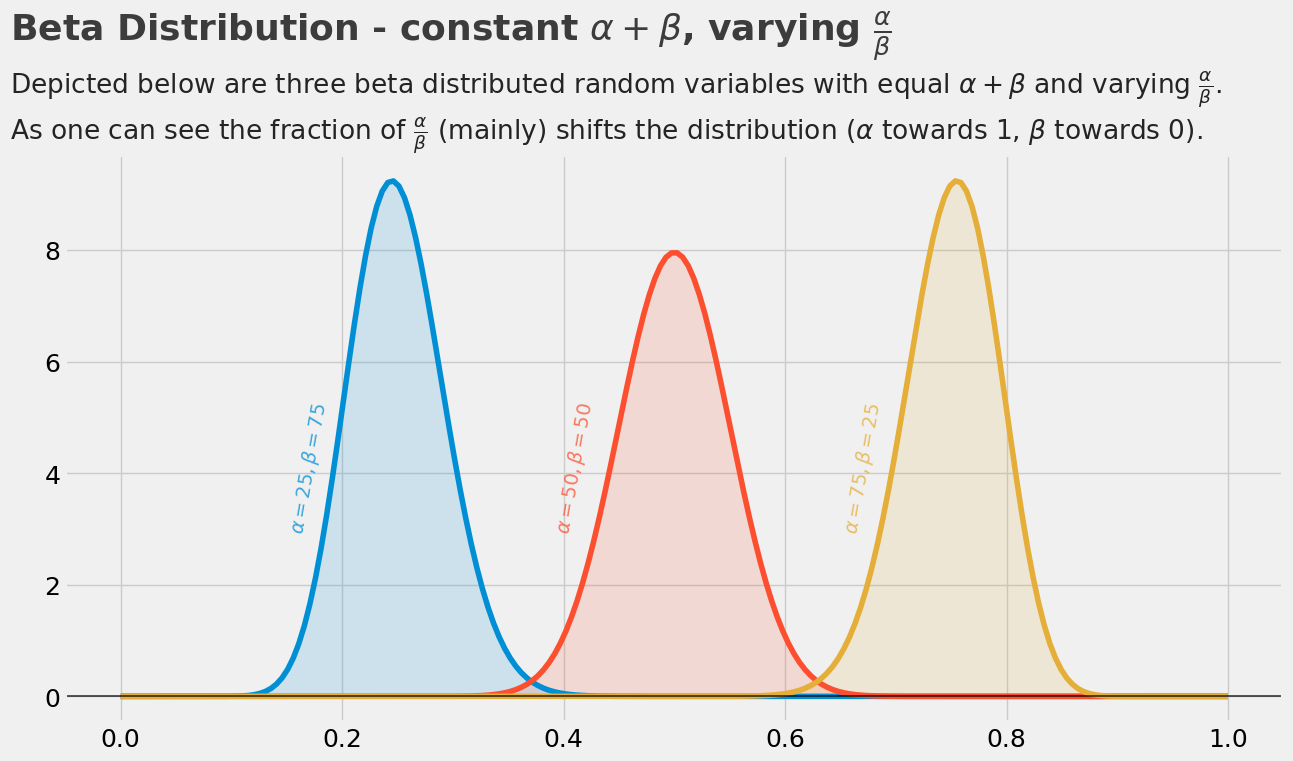

In [3]:
plt.figure(dpi=100)

# A / B = 1/3
plt.plot(np.linspace(0, 1, 200), 
         stats.beta.pdf(np.linspace(0, 1, 200), a=25, b=75),
        )
plt.fill_between(np.linspace(0, 1, 200),
                 stats.beta.pdf(np.linspace(0, 1, 200), a=25, b=75),
                 alpha=.15,
                )

# A / B = 1
plt.plot(np.linspace(0, 1, 200), 
         stats.beta.pdf(np.linspace(0, 1, 200), a=50, b=50),
        )
plt.fill_between(np.linspace(0, 1, 200),
                 stats.beta.pdf(np.linspace(0, 1, 200), a=50, b=50),
                 alpha=.15,
                )

# A / B = 3
plt.plot(np.linspace(0, 1, 200), 
         stats.beta.pdf(np.linspace(0, 1, 200), a=75, b=25),
        )
plt.fill_between(np.linspace(0, 1, 200),
                 stats.beta.pdf(np.linspace(0, 1, 200), a=75, b=25),
                 alpha=.15,
                )

# LEGEND
plt.text(x=0.15, y=5, s=r"$ \alpha = 25, \beta = 75$", rotation=80, alpha=.75, weight="bold", color="#008fd5")
plt.text(x=0.39, y=5, s=r"$ \alpha = 50, \beta = 50$", rotation=80, alpha=.75, weight="bold", color="#fc4f30")
plt.text(x=0.65, y=5, s=r"$ \alpha = 75, \beta = 25$", rotation=80, alpha=.75, weight="bold", color="#e5ae38")


# TICKS
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

# TITLE, SUBTITLE & FOOTER
plt.text(x = -.1, y = 11.75, s = r"Beta Distribution - constant $\alpha + \beta$, varying $\frac{\alpha}{\beta}$",
               fontsize = 26, weight = 'bold', alpha = .75)
plt.text(x = -.1, y = 10, 
         s = 'Depicted below are three beta distributed random variables with '+ r'equal $\alpha+\beta$ and varying $\frac{\alpha}{\beta} $'+'.\nAs one can see the fraction of ' + r'$\frac{\alpha}{\beta} $ (mainly) shifts the distribution ' + r'($\alpha$ towards 1, $\beta$ towards 0).',
         fontsize = 19, alpha = .85)

In [4]:
from scipy.stats import beta

# draw a single sample
print(beta.rvs(a=2, b=2), end="\n\n")

# draw 10 samples
print(beta.rvs(a=2, b=2, size=10))

0.212420441349

[ 0.1707566   0.82840325  0.53855684  0.5391192   0.60484497  0.7118628
  0.65452413  0.50019168  0.42672272  0.53547624]


### Probability Density Function

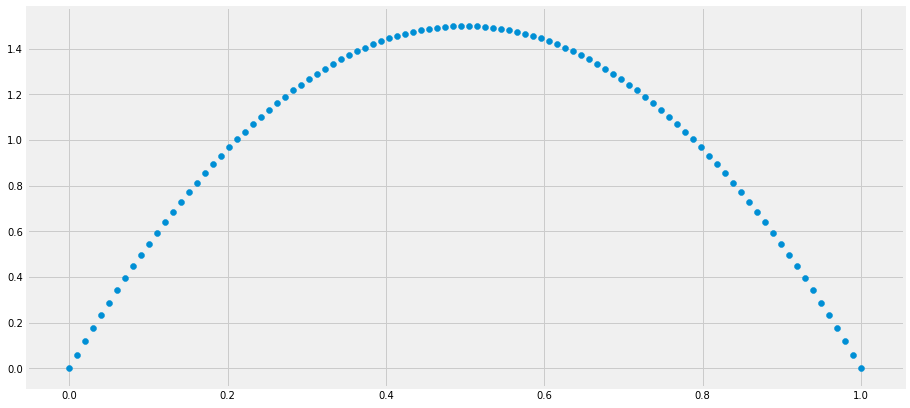

In [5]:
from scipy.stats import beta

# additional import for plotting
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (14, 7)


# continuous pdf for the plot
x_s = np.linspace(0, 1, 100)
y_s = beta.pdf(a=2, b=2, x=x_s)
plt.scatter(x_s, y_s);

### Cumulative Probability Density Function

In [6]:
from scipy.stats import beta

# probability of x less or equal 0.3
print("P(X <0.3) = {:.3}".format(beta.cdf(a=2, b=2, x=0.3)))

# probability of x in [-0.2, +0.2]
print("P(-0.2 < X < 0.2) = {:.3}".format(beta.cdf(a=2, b=2, x=0.2) - beta.cdf(a=2, b=2, x=-0.2)))

P(X <0.3) = 0.216
P(-0.2 < X < 0.2) = 0.104
